In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
#from skimage.measure import compare_ssim
from skimage.metrics import structural_similarity as ssim


In [3]:
img1 = cv2.imread("./homero2.jpg")
img2 = cv2.imread("./trash2.jpg")

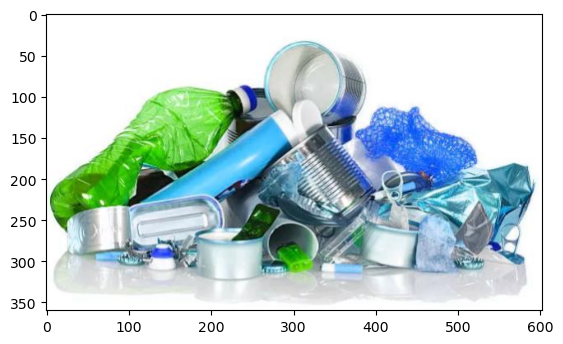

In [4]:
plt.imshow(img2)

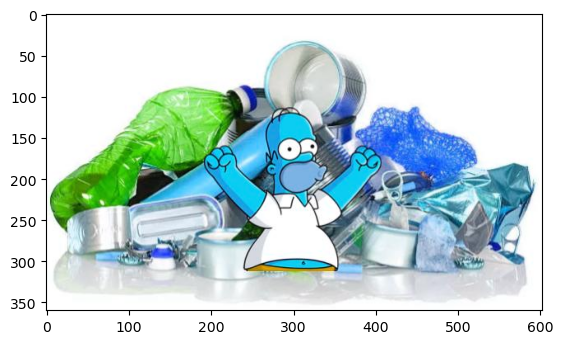

In [5]:
plt.imshow(img1)

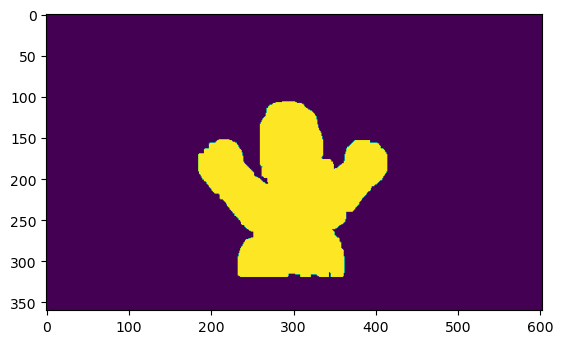

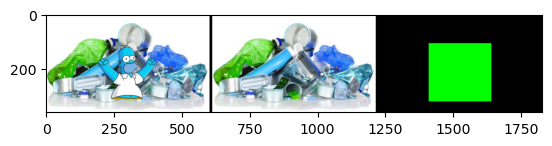

In [6]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# Find the difference between the two images
# Compute the mean structural similarity index
(similar, diff) = ssim(gray1, gray2, full=True)
# diff is in range [0,1]. Convert it in range [0/1] [0, 255]
diff = (diff*255).astype("uint8")
#plt.figure()
#plt.imshow( diff)
# Apply threshold
thresh = cv2.threshold (diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] #cv2.imshow("Threshold", thresh)
# Dilation
kernel = np.ones((5,5), np. uint8)
dilate = cv2.dilate (thresh, kernel, iterations=2)
plt.figure()
plt.imshow( dilate)
#Find contours
contours = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
contours = imutils.grab_contours(contours)

#plt.figure()
#plt.imshow(thresh)


####
overlapping_region = np.zeros_like(img1)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(overlapping_region, (x, y), (x + w, y + h), (0, 255, 0), -1)

# Combine original images with extracted overlapping region
x = np.zeros((img1.shape[0], 10, 3), np.uint8)
result = np.hstack((img1, x, img2, x, overlapping_region))

# Display the results
plt.figure()
plt.imshow(result)
plt.show()






#x = np.zeros((360,10,3), np.uint8) 
#result = np.hstack((img1, x, img2)) 

#plt.figure()
#plt.imshow(result)

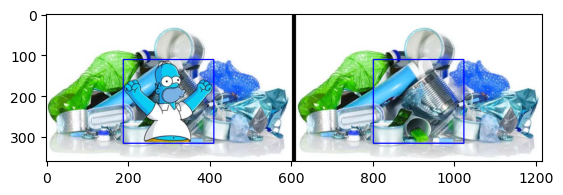

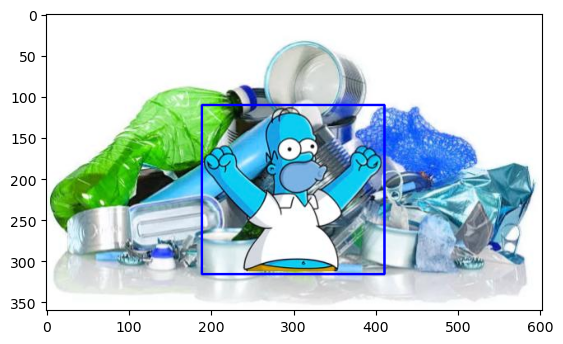

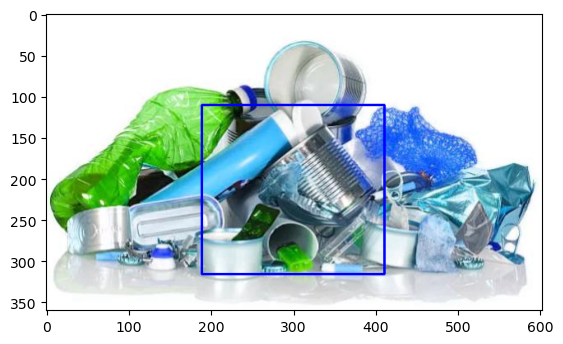

In [7]:
thresh = cv2.threshold (diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] #cv2.imshow("Threshold", thresh)
# Find contours
contours = cv2.findContours (thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
contours = imutils.grab_contours(contours)
# Loop over each contour

for contour in contours:
    if cv2.contourArea (contour) > 100:
    # Calculate bounding box
        x, y, w, h= cv2.boundingRect(contour)
        # Draw rectangle
        #    bounding box
        cv2.rectangle(img1, (x,y), (x+w, y+h), (0,0,255), 2)
        cv2.rectangle(img2, (x,y), (x+w, y+h), (0,0,255), 2)
        #cv2.putText(img2, str(similar, (10,30), cv2.FONT_HERSHEY_SIMPLEX, .7, (255,0,0), 2)|
#Show final images with differences
X = np.zeros((360,10,3), np.uint8) 
result = np.hstack((img1, X, img2)) 
plt.figure()
plt.imshow(result)
plt.figure()
plt.imshow(img1) 
plt.figure()
plt.imshow(img2)


In [8]:
x

189

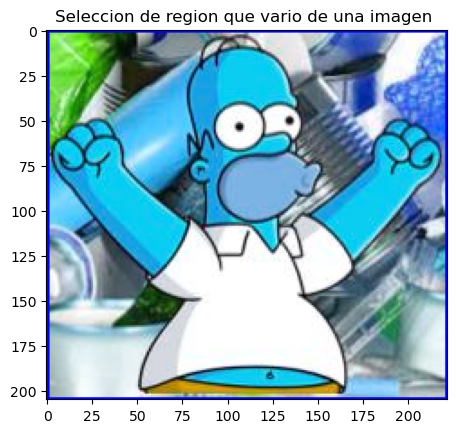

In [9]:
plt.figure()
plt.title("Seleccion de region que vario de una imagen ")
plt.imshow(img1[y:(y+h),x:(x+w)]) 

In [10]:
img1.shape

(360, 603, 3)

In [11]:
(x,y), (x+w, y+h),

((189, 111), (411, 316))